In [26]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

In [59]:
df1 = pd.read_csv('RS_Session_258_AU_1180_A_to_D.csv')
df1.drop(5, inplace=True)
df1.drop(6, inplace=True)
df1['Deficit'] = df1['Overall Import'] - df1['Overall Export']
df1


,Years,Overall Export,Overall Import,Deficit
0,2017-18,498.61,583.11,84.50
1,2018-19,538.08,640.09,102.01
2,2019-20,526.55,602.98,76.43
3,2020-21,497.90,511.12,13.22
4,2021-22,676.53,760.06,83.53


In [56]:
df2 = df1.melt(id_vars='Years', value_vars=['Overall Export', 'Overall Import'], value_name='data', var_name='Type')
df2

,Years,Type,data
0,2017-18,Overall Export,498.61
1,2018-19,Overall Export,538.08
2,2019-20,Overall Export,526.55
3,2020-21,Overall Export,497.90
4,2021-22,Overall Export,676.53
5,2017-18,Overall Import,583.11
6,2018-19,Overall Import,640.09
7,2019-20,Overall Import,602.98
8,2020-21,Overall Import,511.12
9,2021-22,Overall Import,760.06


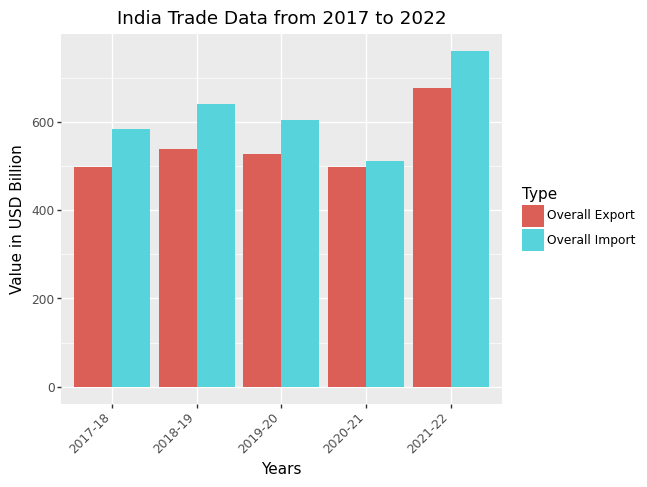

In [61]:
(ggplot(df2, aes(x='Years', y='data', fill = 'Type'))
 + geom_bar(stat = "identity", position = "dodge")
 + labs(title='India Trade Data from 2017 to 2022', x='Years', y='Value in USD Billion')
 + theme(axis_text_x = element_text(angle=45, hjust=1))
).draw()

f:\roop-unleashed\installer\installer_files\conda\Lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


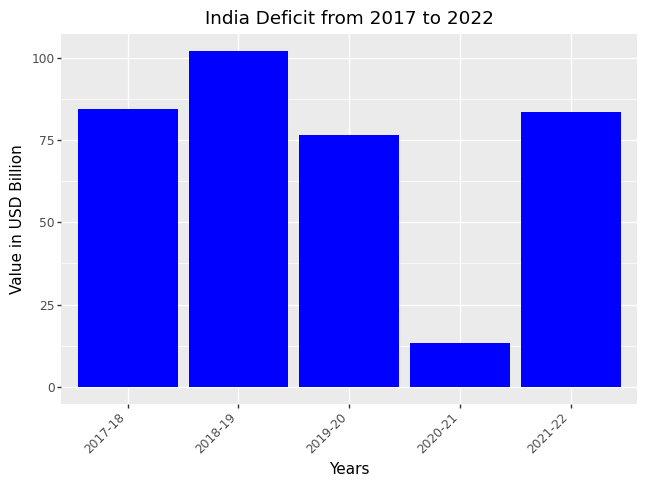

In [60]:
# plot a diverging bar chart of the deficit
(ggplot(df1, aes(x='Years', y='Deficit'))
 + geom_bar(stat = "identity", fill = "blue")
 + scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0)
 + labs(title='India Trade Deficit from 2017 to 2022', x='Years', y='Value in USD Billion')
 + theme(axis_text_x = element_text(angle=45, hjust=1))
).draw()

In [62]:
import matplotlib.pyplot as plt

In [93]:
df3 = pd.read_csv('Year-wise Value of Merchandise Export, Import, Total Trade and Trade balance with USA, Russia, England, China and the European Union between 2004-05 to 2022-23.csv')
df3_export = df3[['Year', 'USA - Export', 'Russia - Export', 'UK - Export', 'China P RP - Export', 'European Union - Export']]
df3_import = df3[['Year', 'USA - Import', 'Russia - Import', 'UK - Import', 'China P RP - Import', 'European Union - Import']]

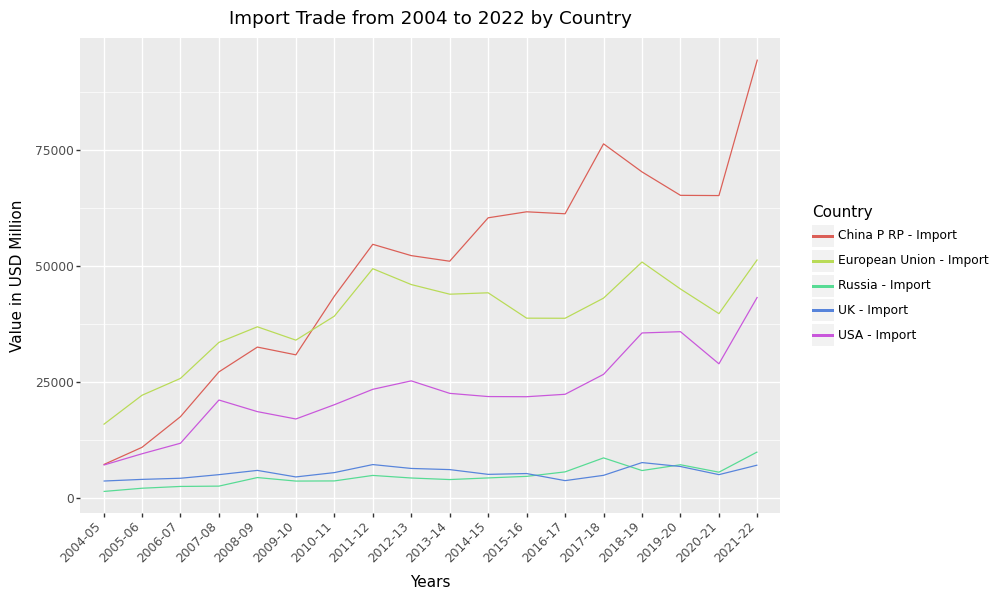

In [119]:
# make a line chart
df3_import_melt = df3_import.melt(id_vars='Year', value_vars=['USA - Import', 'Russia - Import', 'UK - Import', 'China P RP - Import', 'European Union - Import'], value_name='Import', var_name='Country')

(ggplot(df3_import_melt, aes(x='Year', y='Import', group = 'Country', color = 'Country'))
 + geom_line()
 + labs(title='Import Trade from 2004 to 2022 by Country', x='Years', y='Value in USD Million')
 + theme(axis_text_x = element_text(angle=45, hjust=1), figure_size=(10, 6))
).draw()

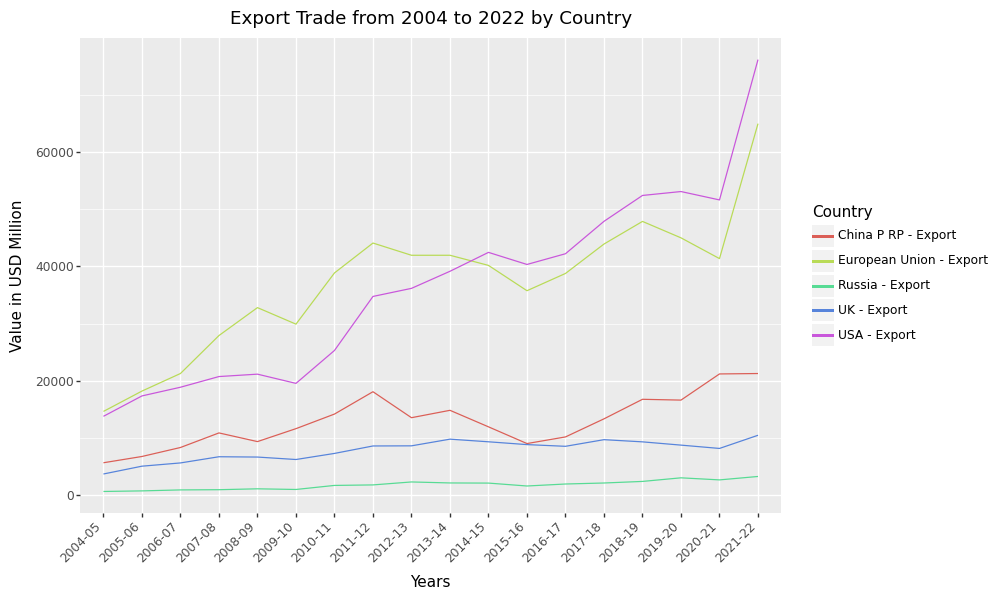

In [122]:
df3_export_melt = df3_export.melt(id_vars='Year', value_vars=['USA - Export', 'Russia - Export', 'UK - Export', 'China P RP - Export', 'European Union - Export'], value_name='Export', var_name='Country')

(ggplot(df3_export_melt, aes(x='Year', y='Export', group = 'Country', color = 'Country'))
 + geom_line()
 + labs(title='Export Trade from 2004 to 2022 by Country', x='Years', y='Value in USD Million')
 + theme(axis_text_x = element_text(angle=45, hjust=1), figure_size=(10, 6))
).draw()

In [127]:
df3_trade = df3[['Year','USA - Export', 'Russia - Export', 'UK - Export', 'China P RP - Export', 'European Union - Export', 'USA - Import', 'Russia - Import', 'UK - Import', 'China P RP - Import', 'European Union - Import']]
df3_trade_melt = df3_trade.melt(id_vars='Year', value_vars=['USA - Export', 'Russia - Export', 'UK - Export', 'China P RP - Export', 'European Union - Export', 'USA - Import', 'Russia - Import', 'UK - Import', 'China P RP - Import', 'European Union - Import'], value_name='Trade', var_name='var')

df3_trade_melt[['Country', 'Type']] = df3_trade_melt['var'].str.split(" - ", expand=True)
df3_trade_melt

,Year,var,Trade,Country,Type
0,2004-05,USA - Export,13775,USA,Export
1,2005-06,USA - Export,17343,USA,Export
2,2006-07,USA - Export,18863,USA,Export
3,2007-08,USA - Export,20731,USA,Export
4,2008-09,USA - Export,21150,USA,Export
...,...,...,...,...,...
175,2017-18,European Union - Import,43067,European Union,Import
176,2018-19,European Union - Import,50863,European Union,Import
177,2019-20,European Union - Import,45041,European Union,Import
178,2020-21,European Union - Import,39716,European Union,Import


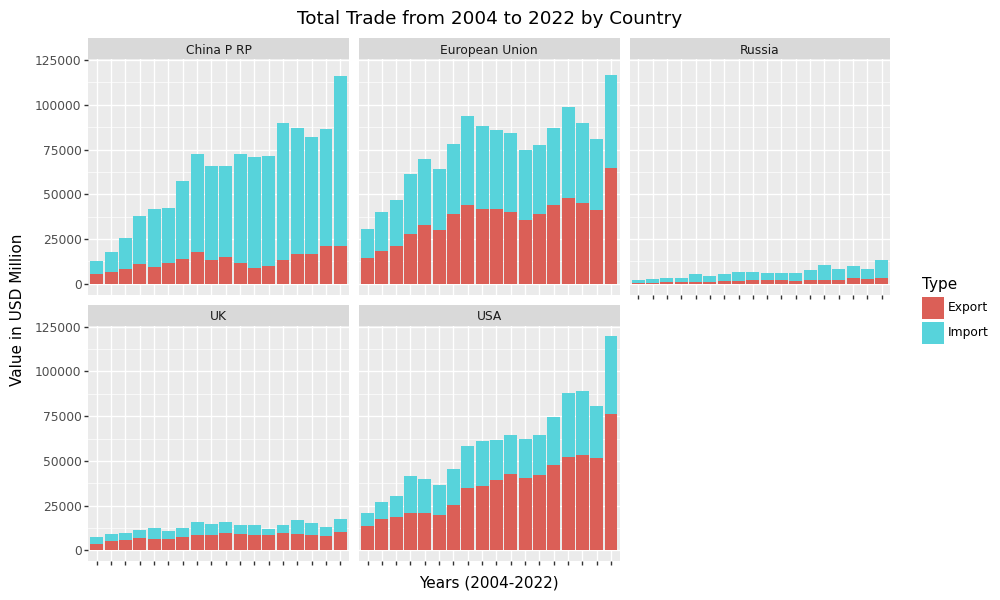

In [138]:
(ggplot(df3_trade_melt, aes(x='Year', y='Trade', fill = 'Type', group = 'Country'))
 + geom_bar(stat = "identity")
 + labs(title='Total Trade from 2004 to 2022 by Country', x='Years (2004-2022)', y='Value in USD Million')
 + theme(axis_text_x = element_blank(), figure_size=(10, 6))
 + facet_wrap('Country')
).draw()

In [137]:
df3_balance = df3[['Year','USA - Trade Balance', 'Russia - Trade Balance', 'UK - Trade Balance', 'China P RP - Trade Balance', 'European Union - Trade Balance']]
df3_balance_melt = df3_balance.melt(id_vars='Year', value_vars=['USA - Trade Balance', 'Russia - Trade Balance', 'UK - Trade Balance', 'China P RP - Trade Balance', 'European Union - Trade Balance'], value_name='Balance', var_name='var')

df3_balance_melt['Country'] = df3_balance_melt['var'].str.split(" - ", expand=True)[0]
df3_balance_melt

,Year,var,Balance,Country
0,2004-05,USA - Trade Balance,6764,USA
1,2005-06,USA - Trade Balance,7880,USA
2,2006-07,USA - Trade Balance,7125,USA
3,2007-08,USA - Trade Balance,-336,USA
4,2008-09,USA - Trade Balance,2588,USA
...,...,...,...,...
85,2017-18,European Union - Trade Balance,840,European Union
86,2018-19,European Union - Trade Balance,-3000,European Union
87,2019-20,European Union - Trade Balance,-50,European Union
88,2020-21,European Union - Trade Balance,1644,European Union


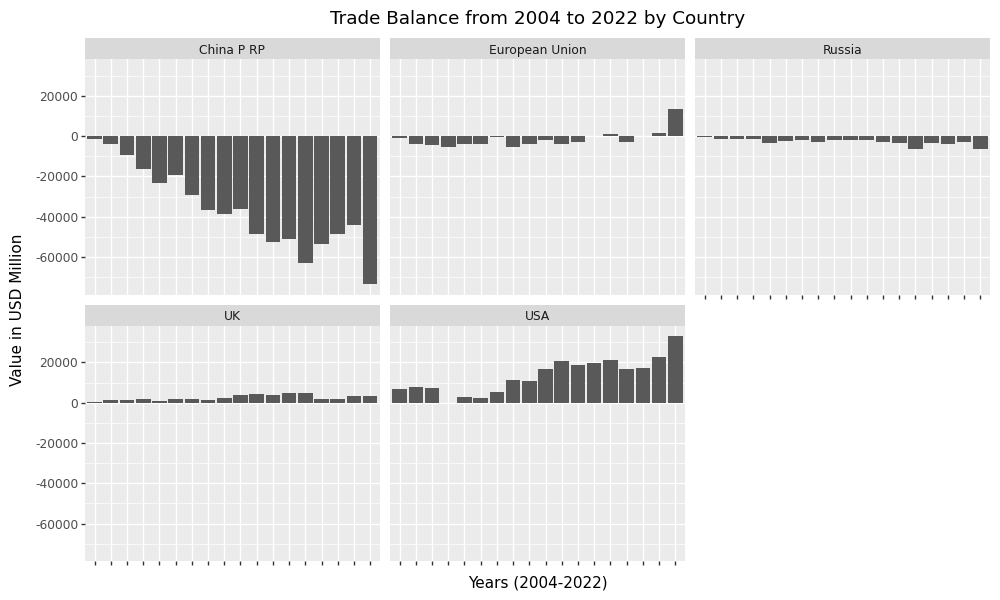

In [139]:
(ggplot(df3_balance_melt, aes(x='Year', y='Balance', group = 'Country'))
 + geom_bar(stat = "identity")
 + labs(title='Trade Balance from 2004 to 2022 by Country', x='Years (2004-2022)', y='Value in USD Million')
 + theme(axis_text_x = element_blank(), figure_size=(10, 6))
 + facet_wrap('Country')
).draw()

In [91]:
df4 = pd.read_csv('Principal_Commodity_wise_export_for_the_year_202223.csv')
df4['PRINCIPLE COMMODITY'].unique().size

# group df4 by PRINCIPLE COMMODITY and take sum of value
df4_grouped = df4.groupby('PRINCIPLE COMMODITY').sum()
df4_grouped.drop(['COUNTRY', 'UNIT', 'QUANTITY'], axis = 1, inplace=True)
df4_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)
df4_grouped.reset_index(inplace=True)
df4_grouped.drop([0], inplace=True)
df4_grouped

,PRINCIPLE COMMODITY,Value(US$ million)
1,PETROLEUM PRODUCTS ...,97468.45
2,"PEARL, PRECS, SEMIPRECS STONES ...",25231.71
3,"DRUG FORMULATIONS, BIOLOGICALS ...",19458.66
4,IRON AND STEEL ...,13397.50
5,TELECOM INSTRUMENTS ...,12850.78
...,...,...
164,PROJECT GOODS ...,1.98
165,PROCESSED MEAT ...,1.57
166,RAW HIDES AND SKINS ...,1.33
167,"WOOL, RAW ...",0.49


In [92]:
# group all the categories after top 10 into other category
df4_grouped['PRINCIPLE COMMODITY'] = df4_grouped['PRINCIPLE COMMODITY'].apply(lambda x: 'Other' if x not in df4_grouped['PRINCIPLE COMMODITY'].unique()[:10] else x)
df4_grouped = df4_grouped.groupby('PRINCIPLE COMMODITY').sum()
df4_grouped.drop('Other', inplace=True)
df4_grouped.reset_index(inplace=True)
df4_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)


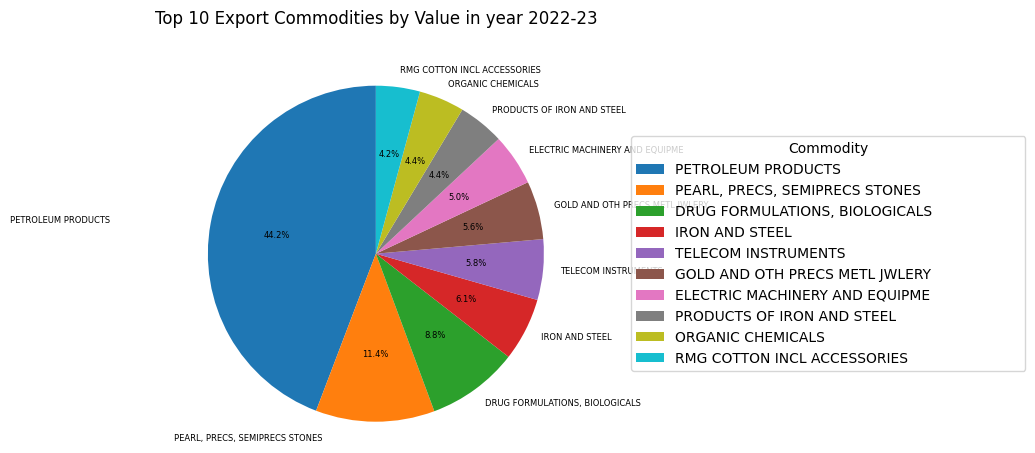

In [95]:

plt.pie(df4_grouped['Value(US$ million)'], labels = df4_grouped['PRINCIPLE COMMODITY'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})

plt.axis('equal')
plt.title('Top 10 Export Commodities by Value in year 2022-23', y=1.1)
plt.ylabel("")
plt.legend(
          title="Commodity",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

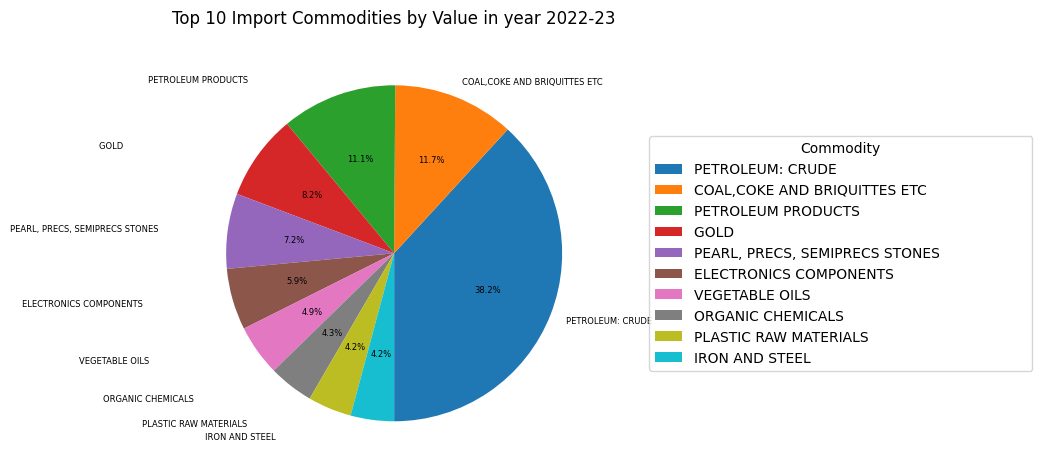

In [96]:
# do the same steps done above for export but do it for import data
df5 = pd.read_csv('Principal_Commodity_wise_import_for_the_year_202223.csv')
df5_grouped = df5.groupby('PRINCIPLE COMMODITY').sum()
df5_grouped.drop(['COUNTRY', 'UNIT', 'QUANTITY'], axis = 1, inplace=True)
df5_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)
df5_grouped.reset_index(inplace=True)
df5_grouped.drop([0], inplace=True)

df5_grouped['PRINCIPLE COMMODITY'] = df5_grouped['PRINCIPLE COMMODITY'].apply(lambda x: 'Other' if x not in df5_grouped['PRINCIPLE COMMODITY'].unique()[:10] else x)
df5_grouped = df5_grouped.groupby('PRINCIPLE COMMODITY').sum()

df5_grouped.drop('Other', inplace=True)
df5_grouped.reset_index(inplace=True)
df5_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)
plt.pie(df5_grouped['Value(US$ million)'], labels = df5_grouped['PRINCIPLE COMMODITY'], autopct='%1.1f%%', startangle=-90, textprops={'fontsize': 6})

plt.axis('equal')
plt.title('Top 10 Import Commodities by Value in year 2022-23', y=1.1)
plt.ylabel("")
plt.legend(
          title="Commodity",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [99]:
df5_grouped

,PRINCIPLE COMMODITY,Value(US$ million)
7,PETROLEUM: CRUDE ...,162205.15
0,"COAL,COKE AND BRIQUITTES ETC ...",49735.34
6,PETROLEUM PRODUCTS ...,47212.97
2,GOLD ...,35016.30
5,"PEARL, PRECS, SEMIPRECS STONES ...",30700.27
1,ELECTRONICS COMPONENTS ...,25126.45
9,VEGETABLE OILS ...,20837.71
4,ORGANIC CHEMICALS ...,18350.81
8,PLASTIC RAW MATERIALS ...,17880.71
3,IRON AND STEEL ...,17718.33


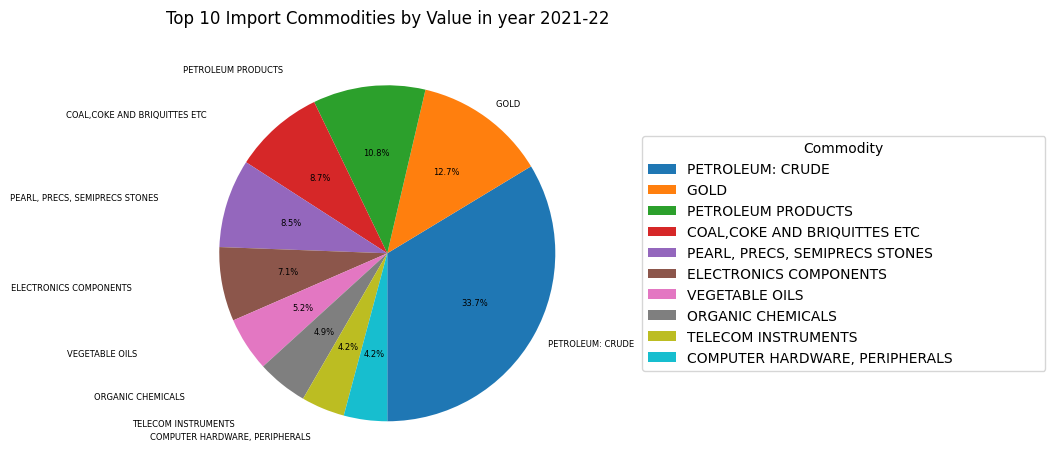

In [97]:
# do the same steps done for export and import data, but do it for year 2021-22
df6 = pd.read_csv('Principal_Commodity_wise_import_for_the_year_202122.csv')
df6_grouped = df6.groupby('PRINCIPLE COMMODITY').sum()
df6_grouped.drop(['COUNTRY', 'UNIT', 'QUANTITY'], axis = 1, inplace=True)
df6_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)
df6_grouped.reset_index(inplace=True)
df6_grouped.drop([0], inplace=True)

df6_grouped['PRINCIPLE COMMODITY'] = df6_grouped['PRINCIPLE COMMODITY'].apply(lambda x: 'Other' if x not in df6_grouped['PRINCIPLE COMMODITY'].unique()[:10] else x)
df6_grouped = df6_grouped.groupby('PRINCIPLE COMMODITY').sum()

df6_grouped.drop('Other', inplace=True)
df6_grouped.reset_index(inplace=True)
df6_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)
plt.pie(df6_grouped['Value(US$ million)'], labels = df6_grouped['PRINCIPLE COMMODITY'], autopct='%1.1f%%', startangle=-90, textprops={'fontsize': 6})

plt.axis('equal')
plt.title('Top 10 Import Commodities by Value in year 2021-22', y=1.1)
plt.ylabel("")
plt.legend(
          title="Commodity",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()



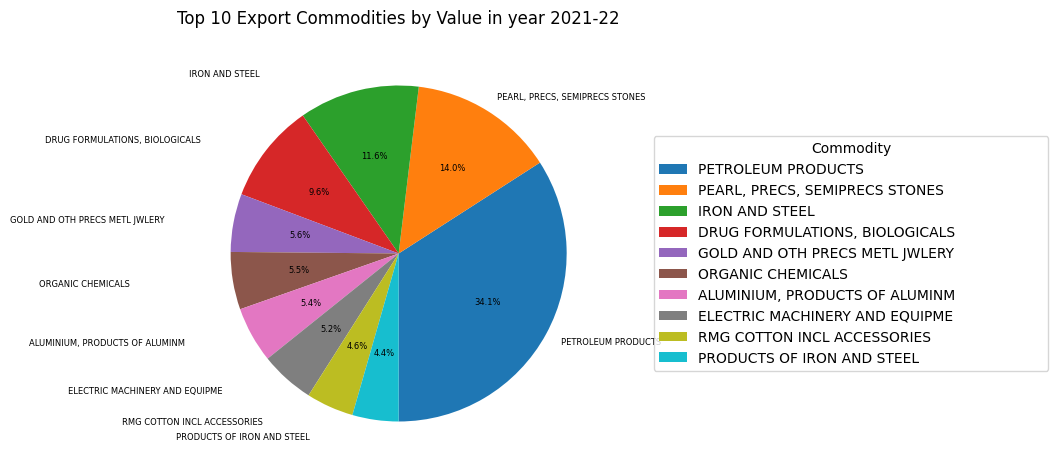

In [98]:
# do the same for export

df7 = pd.read_csv('Principal_Commodity_wise_export_for_the_year_202122.csv')
df7_grouped = df7.groupby('PRINCIPLE COMMODITY').sum()
df7_grouped.drop(['COUNTRY', 'UNIT', 'QUANTITY'], axis = 1, inplace=True)
df7_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)
df7_grouped.reset_index(inplace=True)
df7_grouped.drop([0], inplace=True)

df7_grouped['PRINCIPLE COMMODITY'] = df7_grouped['PRINCIPLE COMMODITY'].apply(lambda x: 'Other' if x not in df7_grouped['PRINCIPLE COMMODITY'].unique()[:10] else x)
df7_grouped = df7_grouped.groupby('PRINCIPLE COMMODITY').sum()

df7_grouped.drop('Other', inplace=True)
df7_grouped.reset_index(inplace=True)
df7_grouped.sort_values(by = ['Value(US$ million)'], inplace=True, ascending=False)

plt.pie(df7_grouped['Value(US$ million)'], labels = df7_grouped['PRINCIPLE COMMODITY'], autopct='%1.1f%%', startangle=-90, textprops={'fontsize': 6})

plt.axis('equal')
plt.title('Top 10 Export Commodities by Value in year 2021-22', y=1.1)
plt.ylabel("")
plt.legend(
          title="Commodity",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()